<h1>Importing Libraries and Database </h1>

In [2]:
import os
import sys
module_path = os.path.abspath(os.path.join(os.pardir, os.pardir))
if module_path not in sys.path:
    sys.path.append(module_path)

In [3]:
from src.data import data_collection

In [500]:
import psycopg2
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [8]:
DBNAME = "opportunity_youth"

In [9]:
conn = psycopg2.connect(dbname=DBNAME)

<h1>Querying Data</h1>
We chose Puma's based on the school districs that were shown in the 2016 Report: Auburn, Federal Way, Highline, Kent, Renton, (South) Seattle, and Tukwila was what the origonal data included. We filtered by Age, Job status, and school status based on the definition of oppurtunity youth. 

In [518]:
#Defiing Dataframe based on Query search
# puma correlate to South King county regions
# cow = '9' is unemployed
# fschp = '0' is not enrolled in school
oy_df = pd.read_sql('''SELECT * 
FROM pums_2017
WHERE puma IN ('11612','11613','11614','11615','11604', '11610', '11611')
AND agep BETWEEN '16' AND '24'
AND cow = '9'
AND fschp = '0'
;''', conn)

<h1>Estimating Population of Opportunity Youth</h1>
We created a list of the the estimated population by using the person weighted multiplier for each Puma(region). From that we took the sum of all the regions to get the total.


In [519]:
#a list of the estimated population by each region and the total population for all 7 regions
population = oy_df.groupby('puma')['pwgtp'].sum()   # pwgtp was the weight each person held 
estimated_population = sum(population)
estimated_population

2105.0

In [528]:
# dictionary of Puma number, name of it and population based on weighted amount. 
region_dic = {'11612': ['Federal Way,Des moines Cities & Vashon island', population['11612']], 
 '11604': ['South East Seattle', population['11604']],
 '11615': ['Maple Valley, Covingtion and Enumclaw Cities',population['11615']],
 '11614': ['Auburn City & Lakeland', population['11614']],
 '11613': ['Kent City',population['11613']],
 '11611': ['Burien, SeaTac, Tukwita Cities',population['11611']],
 '11610': ['Renton City, Fairwood, Bryn Mawr and Skyway', population['11610']]}


In [525]:
city_list = [item[0] for item in region_dic.values()]  # created a list of the cities based on the region_dic 
estimated_population_region = [item[1] for item in region_dic.values()] # created a listed of the estimated population per region

In [526]:
# adjusted city list so the string is on muliple lines in the graph
city_list_adj = [sub.replace(',',',\n') for sub in city_list]

<h1>Plotting Information</h1>
Created a bar graph comparing the Estimated Population per region 

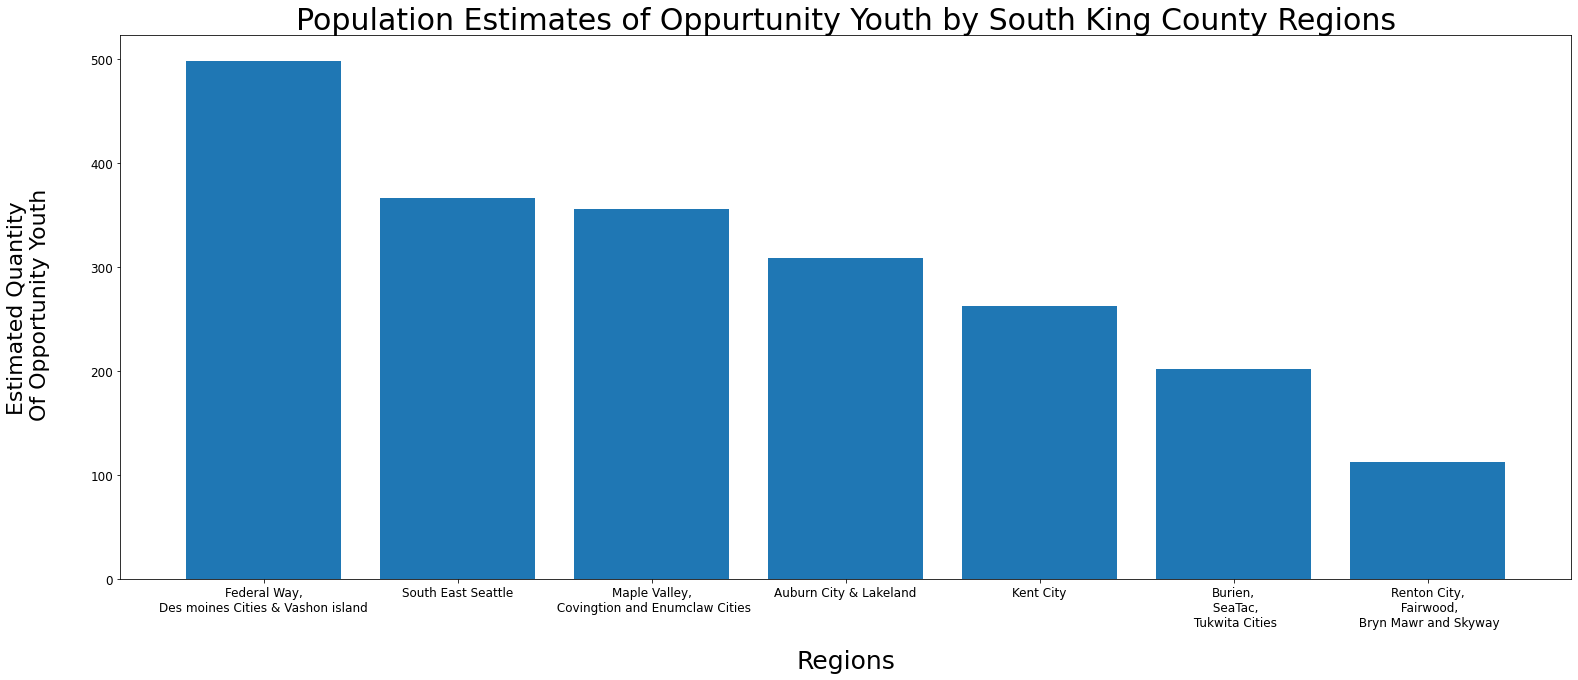

In [546]:
#Printing a Bar graph of the population estimate per each puma(region)
figure, ax = plt.subplots(1, 1, figsize = (26,10));

x = city_list_adj;
y = estimated_population_region;
ax.bar(x, y);


ax.set_ylabel('Estimated Quantity\n Of Opportunity Youth', fontsize = 22, rotation = 90, labelpad = 40);
ax.set_xlabel('Regions', fontsize = 25, labelpad = 20);
ax.set_title('Population Estimates of Oppurtunity Youth by South King County Regions', fontsize = 30);
ax.set_xticklabels(city_list_adj, wrap = True);
ax.tick_params(axis='both', which='major', labelsize=12)
                   